# CPU utilization for both architectures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

micro_arch = pd.read_csv("micro_arch.csv")
mono_arch = pd.read_csv("mono_arch.csv")

micro_arch.head(), mono_arch.head()


(             timestamp     value
 0  2024-05-04 18:49:00  0.331694
 1  2024-05-04 18:49:10  0.456657
 2  2024-05-04 18:49:20  0.581620
 3  2024-05-04 18:49:30  0.706583
 4  2024-05-04 18:49:40  0.831545,
              timestamp     value
 0  2024-05-04 17:29:00  0.265591
 1  2024-05-04 17:29:10  0.411240
 2  2024-05-04 17:29:20  0.556888
 3  2024-05-04 17:29:30  0.702537
 4  2024-05-04 17:29:40  0.848185)

## Plotting data

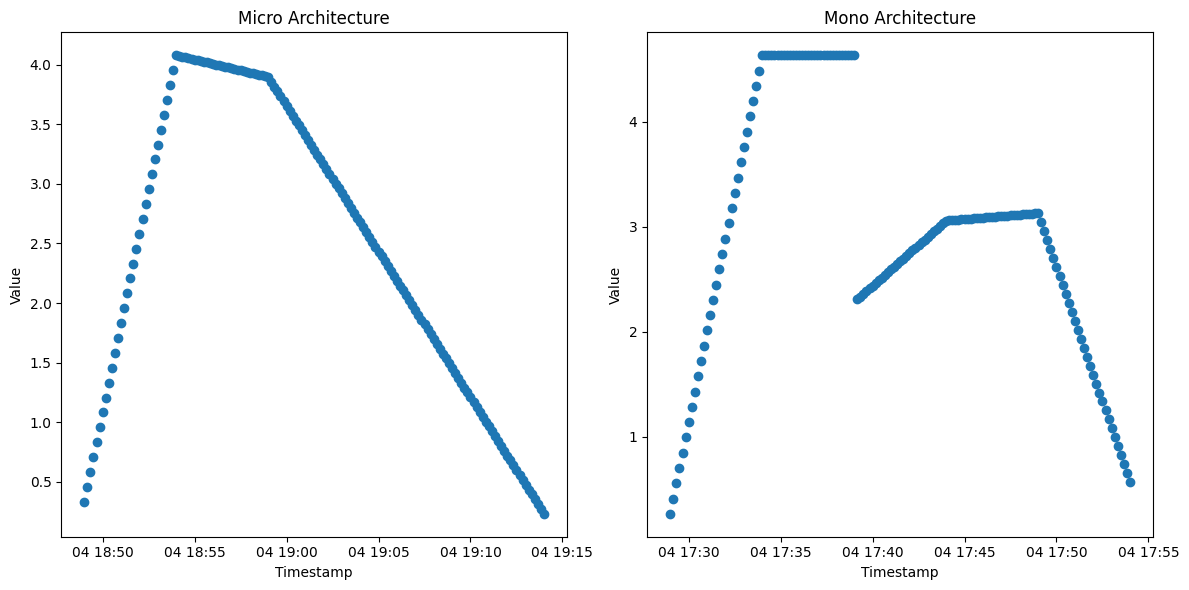

In [2]:
# Step 2: Plotting
# Convert the timestamps to datetime
micro_arch['timestamp'] = pd.to_datetime(micro_arch['timestamp'])
mono_arch['timestamp'] = pd.to_datetime(mono_arch['timestamp'])

# Scatter plot for micro_arch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(micro_arch['timestamp'], micro_arch['value'])
plt.title('Micro Architecture')
plt.xlabel('Timestamp')
plt.ylabel('Value')

# Scatter plot for mono_arch
plt.subplot(1, 2, 2)
plt.scatter(mono_arch['timestamp'], mono_arch['value'])
plt.title('Mono Architecture')
plt.xlabel('Timestamp')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [4]:
micro_values = micro_arch['value']
mono_values = mono_arch['value']

t_stat, p_val = stats.ttest_ind(micro_values, mono_values)
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

# Hypothesis for T-Test
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis for the T-Test: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis for the T-Test: The means are not significantly different.")


anova_stat, anova_p = stats.f_oneway(micro_values, mono_values)
print(f"ANOVA: F-statistic = {anova_stat:.4f}, p-value = {anova_p:.4f}")

# Hypothesis for ANOVA Test
if anova_p < alpha:
    print("Reject the null hypothesis for the ANOVA Test: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis for the ANOVA Test: The means are not significantly different.")


T-Test: t-statistic = -3.3823, p-value = 0.0008
Reject the null hypothesis for the T-Test: The means are significantly different.
ANOVA: F-statistic = 11.4402, p-value = 0.0008
Reject the null hypothesis for the ANOVA Test: The means are significantly different.


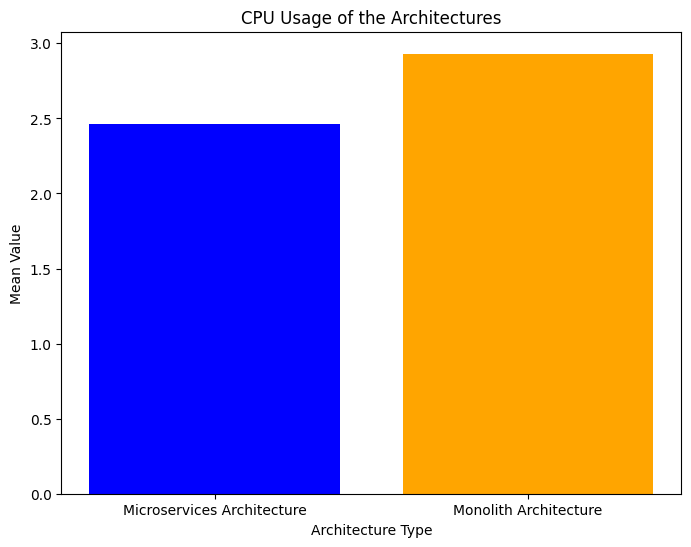

In [6]:
mean_micro = micro_arch['value'].mean()
mean_mono = mono_arch['value'].mean()

labels = ['Microservices Architecture', 'Monolith Architecture']
mean_values = [mean_micro, mean_mono]

plt.figure(figsize=(8, 6))
plt.bar(labels, mean_values, color=['blue', 'orange'])
plt.title('CPU Usage of the Architectures')
plt.xlabel('Architecture Type')
plt.ylabel('Mean Value')
plt.show()


# Power Consumption Analysis

In [8]:
microservices_data = pd.read_csv('power_consumption_microservices.csv')
monolith_data = pd.read_csv('power_consumption_monolith.csv')

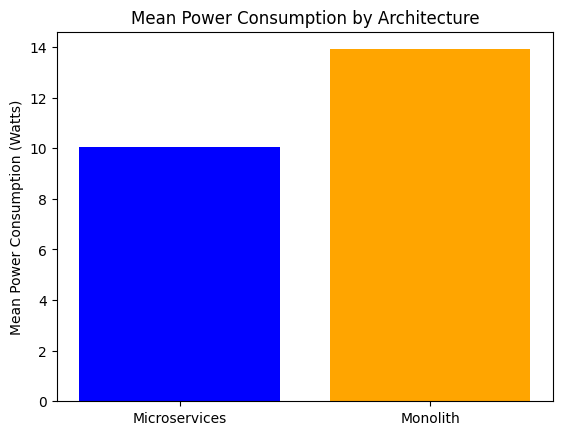

T TEST: 
 Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = 0.0016).
ANOVA TEST: 
 Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = 0.0016).


In [16]:
# Calculating the mean for each dataset
microservices_mean = microservices_data['Watts'].mean()
monolith_mean = monolith_data['Watts'].mean()

plt.bar(['Microservices', 'Monolith'], [microservices_mean, monolith_mean], color=['blue', 'orange'])
plt.ylabel('Mean Power Consumption (Watts)')
plt.title('Mean Power Consumption by Architecture')
plt.show()

# Perform T-Test
t_stat, p_value = stats.ttest_ind(microservices_data['Watts'], monolith_data['Watts'])

alpha = 0.05
if p_value < alpha:
    t_test_result = f"Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = {p_value:.4f})."
else:
    t_test_result = f"Fail to reject the null hypothesis: there is no significant difference in power consumption between the two architectures (p-value = {p_value:.4f})."

# Perform ANOVA Test
anova_stat, anova_p_value = stats.f_oneway(microservices_data['Watts'], monolith_data['Watts'])

if anova_p_value < alpha:
    anova_result = f"Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = {anova_p_value:.4f})."
else:
    anova_result = f"Fail to reject the null hypothesis: there is no significant difference in power consumption between the two architectures (p-value = {anova_p_value:.4f})."

print("T TEST: \n", t_test_result)
print("ANOVA TEST: \n", anova_result)